# Data visualization of Yellow,Green and Uber taxi trip data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # datetime operations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import dask.dataframe as dd

In [14]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [ ]:

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 

## Yellow taxi 

In [18]:
# Load yellow trip data csv
df_trip = pd.read_csv('C:/Users/shch/Desktop/Taxi Demand/yellow_tripdata_2014-05.csv')
df_trip.columns

Index(['vendor_id', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_distance', ' pickup_longitude',
       ' pickup_latitude', ' rate_code', ' store_and_fwd_flag',
       ' dropoff_longitude', ' dropoff_latitude', ' payment_type',
       ' fare_amount', ' surcharge', ' mta_tax', ' tip_amount',
       ' tolls_amount', ' total_amount'],
      dtype='object')

In [19]:
print(df_trip.shape)
df_trip.head()
print(df_trip.vendor_id.unique())


(14774041, 18)
['VTS' 'CMT']


In [20]:
# Check data for null values
#df_trip.isnull().values.any()
df_trip.isnull().sum()

vendor_id                    0
 pickup_datetime             0
 dropoff_datetime            0
 passenger_count             0
 trip_distance               0
 pickup_longitude            0
 pickup_latitude             0
 rate_code                   0
 store_and_fwd_flag    7484517
 dropoff_longitude           0
 dropoff_latitude            0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
dtype: int64

In [8]:
# df_trip_null = df_trip[df_trip.isnull().any(axis=1)]
# print(df_trip_null.shape)

(7484517, 18)


In [27]:
df_trip.columns = [c.replace(" ", "") for c in df_trip.columns] # remove space in column name
df_trip=df_trip[['vendor_id','passenger_count','trip_distance','pickup_datetime', 'pickup_latitude', 'pickup_longitude','dropoff_datetime', 'dropoff_latitude', 'dropoff_longitude']]
df_trip.columns=['vendor','passenger','distance','pDate', 'pLat', 'pLon','dDate', 'dLat', 'dLon'] # rename for future merge
df_trip["Type"]="yellow" # EDA analysis label

In [37]:
df_trip["pDate"]=df_trip["pDate"].str[0:13].replace("\s+","-", regex=True) 
df_trip["dDate"]=df_trip["dDate"].str[0:13].replace("\s+","-", regex=True) 

### based on pickup and dropoff locations

Text(0, 0.5, 'Latitude')

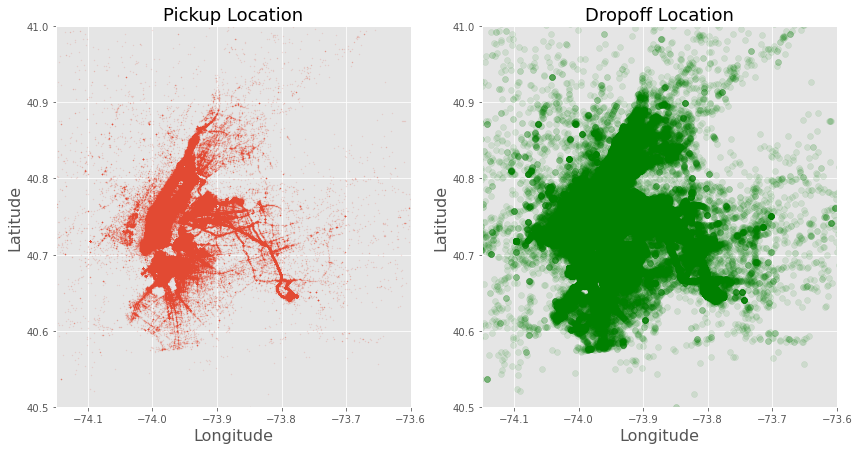

In [32]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(121)
ax1.scatter(df_trip['pLon'],df_trip['pLat'],s=1,alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)

ax2 = fig.add_subplot(122)
ax2.scatter(df_trip['pLon'],df_trip['pLat'],color='green',alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.title('Dropoff Location',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)

### based on trip distances

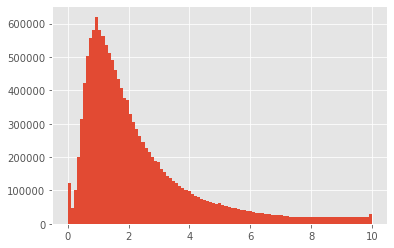

In [34]:
df_trip.distance.hist(bins=np.linspace(0., 10., 100))

### based on no. of trips

#### no. of trips per day in a month

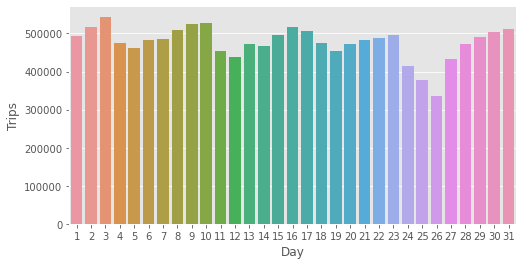

In [41]:
# Trips per day
df_trip['pDate']=pd.to_datetime(df_trip['pDate'])
plt.figure(figsize=(8,4))
ax = sns.countplot(df_trip.pDate.dt.day)
ax.set(xlabel='Day', ylabel='Trips')
plt.show()

#### no. of trips per hour in a day

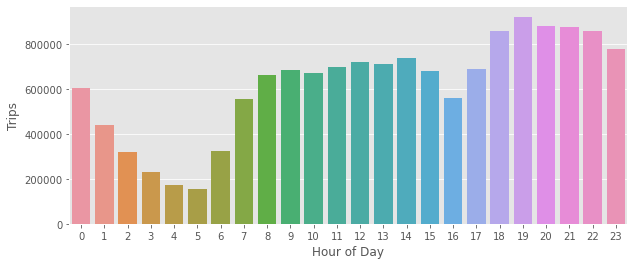

In [42]:

# Trips per hour
plt.figure(figsize=(10,4))
ax = sns.countplot(df_trip.pDate.dt.hour)
ax.set(xlabel='Hour of Day', ylabel='Trips')
plt.show()


## Green taxi

In [46]:
# Load green trip data csv
green = pd.read_csv('C:/Users/shch/Desktop/Taxi Demand/green_tripdata_2014-05.csv')
green.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'Total_amount',
       'Payment_type', 'Trip_type '],
      dtype='object')

In [51]:
green.columns = [c.replace(" ", "") for c in green.columns] # remove space in column name
# green['lpep_pickup_datetime']=green['VendorID']
# green.index=np.arange(green.shape[0])
green=green[['Passenger_count','Trip_distance','lpep_pickup_datetime', 'Pickup_latitude', 'Pickup_longitude','Lpep_dropoff_datetime', 'Dropoff_latitude', 'Dropoff_longitude']]
green.columns=['passenger','distance','pDate', 'pLat', 'pLon','dDate', 'dLat', 'dLon'] # rename for future merge
green["Type"]="green" # EDA analysis label

### based on pickup and dropoff locations

Text(0, 0.5, 'Latitude')

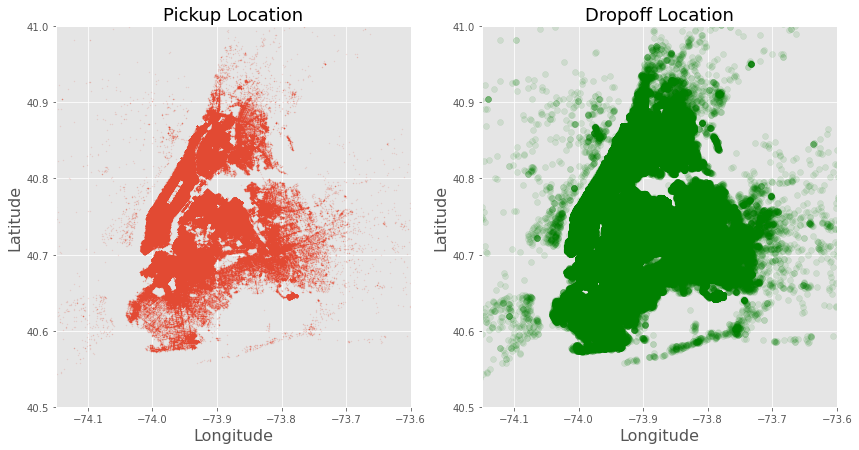

In [54]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(121)
ax1.scatter(green['pLon'],green['pLat'],s=1,alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)

ax2 = fig.add_subplot(122)
ax2.scatter(green['pLon'],green['pLat'],color='green',alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.title('Dropoff Location',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)

### based on trip distances

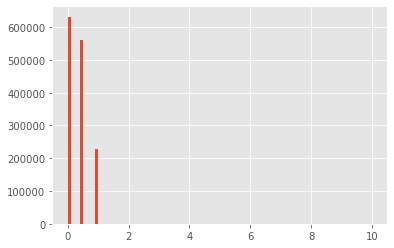

In [55]:
green.distance.hist(bins=np.linspace(0., 10., 100))

### based on no. of trips in a day

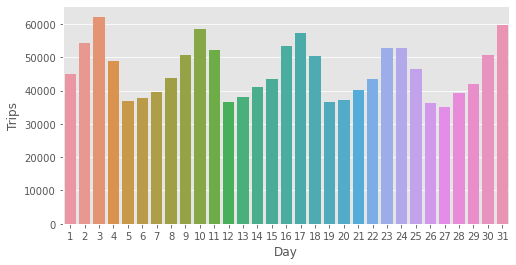

In [57]:
# Trips per day
green['pDate']=pd.to_datetime(green['pDate'])
plt.figure(figsize=(8,4))
ax = sns.countplot(green.pDate.dt.day)
ax.set(xlabel='Day', ylabel='Trips')
plt.show()

### based on no.of trips in an hour

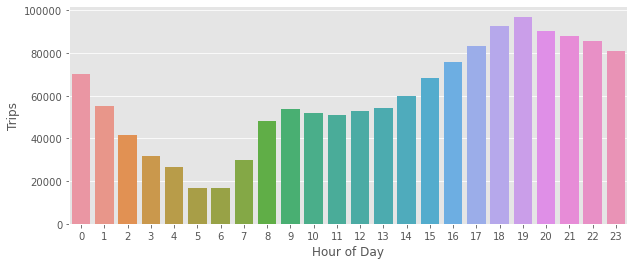

In [58]:
# Trips per hour
plt.figure(figsize=(10,4))
ax = sns.countplot(green.pDate.dt.hour)
ax.set(xlabel='Hour of Day', ylabel='Trips')
plt.show()

## Uber taxi

In [71]:
# Load green trip data csv
uber = pd.read_csv('C:/Users/shch/Desktop/Taxi Demand/uber-raw-data-may14.csv')
uber.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [72]:
uber.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [73]:
uber.columns=['Date', 'Lat', 'Lon', 'Base']
# uber=uber.drop(['Base'], axis=1)
uber["Type"]="uber"
uber["Date"]=pd.to_datetime(uber["Date"]).dt.strftime('%Y-%m-%d-%H')

Text(0.5, 1.0, 'Pickup Location')

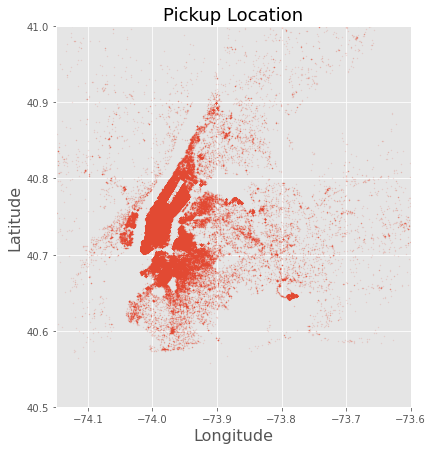

In [74]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(121)
ax1.scatter(uber['Lon'],uber['Lat'],s=1,alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)


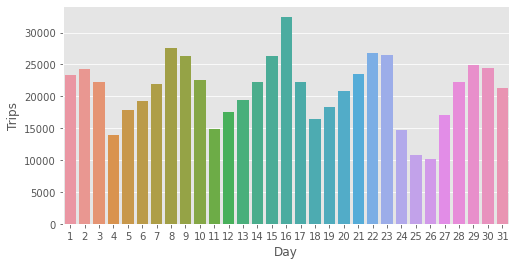

In [75]:
# Trips per day
uber['Date']=pd.to_datetime(uber['Date'])
plt.figure(figsize=(8,4))
ax = sns.countplot(uber.Date.dt.day)
ax.set(xlabel='Day', ylabel='Trips')
plt.show()

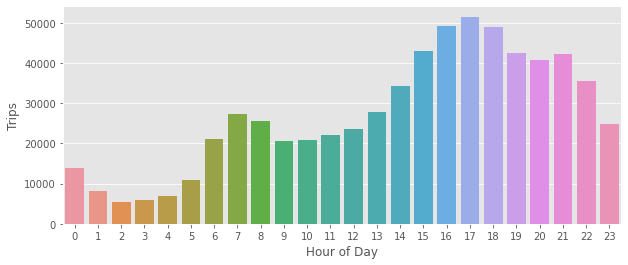

In [76]:
# Trips per hour
plt.figure(figsize=(10,4))
ax = sns.countplot(uber.Date.dt.hour)
ax.set(xlabel='Hour of Day', ylabel='Trips')
plt.show()

In [81]:
uber['DayOfWeekNum'] = uber['Date'].dt.dayofweek
uber['DayOfWeek'] = uber['Date'].dt.day_name()

In [82]:
uber

,Date,Lat,Lon,Base,Type,DayOfWeekNum,DayOfWeek
0,2014-05-01 00:00:00,40.7521,-73.9914,B02512,uber,3,Thursday
1,2014-05-01 00:00:00,40.6965,-73.9715,B02512,uber,3,Thursday
2,2014-05-01 00:00:00,40.7464,-73.9838,B02512,uber,3,Thursday
3,2014-05-01 00:00:00,40.7463,-74.0011,B02512,uber,3,Thursday
4,2014-05-01 00:00:00,40.7594,-73.9734,B02512,uber,3,Thursday
...,...,...,...,...,...,...,...
652430,2014-05-31 23:00:00,40.7309,-74.0014,B02764,uber,5,Saturday
652431,2014-05-31 23:00:00,40.7528,-73.9798,B02764,uber,5,Saturday
652432,2014-05-31 23:00:00,40.7158,-73.9519,B02764,uber,5,Saturday
652433,2014-05-31 23:00:00,40.6961,-73.8997,B02764,uber,5,Saturday


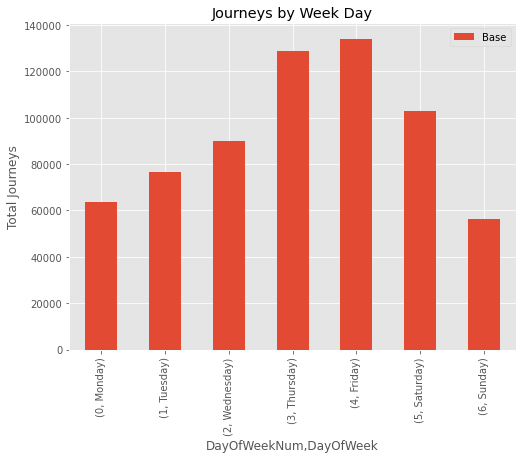

In [84]:
uber_weekdays = uber.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');